Build a regression model.

In [51]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [63]:
fsq_ylp_ctbk = pd.read_csv(f'/Users/kamininayyar/Github_old_pc/GitHub_frm_old_pc/fsq_ylp_ctbyk.csv')
fsq_ylp_ctbk.tail(5)
fsq_ylp_ctbk = fsq_ylp_ctbk.fillna(1)
fsq_ylp_ctbk

,empty_slots,free_bikes,name,lat-long,distance,rating,popularity
0,1.0,18.0,Orient Heights T Stop - Bennington St at Sarat...,1,1.0,1.0,1.000000
1,20.0,12.0,Maverick Square - Lewis Mall,1,1.0,1.0,1.000000
2,2.0,14.0,East Boston Neighborhood Health Center - 20 Ma...,1,1.0,1.0,1.000000
3,4.0,11.0,Bennington St at Byron St,1,1.0,1.0,1.000000
4,6.0,9.0,Boston East - 126 Border St,1,1.0,1.0,1.000000
...,...,...,...,...,...,...,...
481,1.0,1.0,Starbucks,0 42.386781\n1 42.368844\n2 42....,1226.0,6.9,0.976767
482,1.0,1.0,Redpath Stage at Harbourfront,0 42.386781\n1 42.368844\n2 42....,1212.0,6.9,0.875322
483,1.0,1.0,E11Even,0 42.386781\n1 42.368844\n2 42....,1412.0,7.6,0.983906
484,1.0,1.0,Toronto Railway Heritage Centre,0 42.386781\n1 42.368844\n2 42....,1496.0,8.0,0.991425


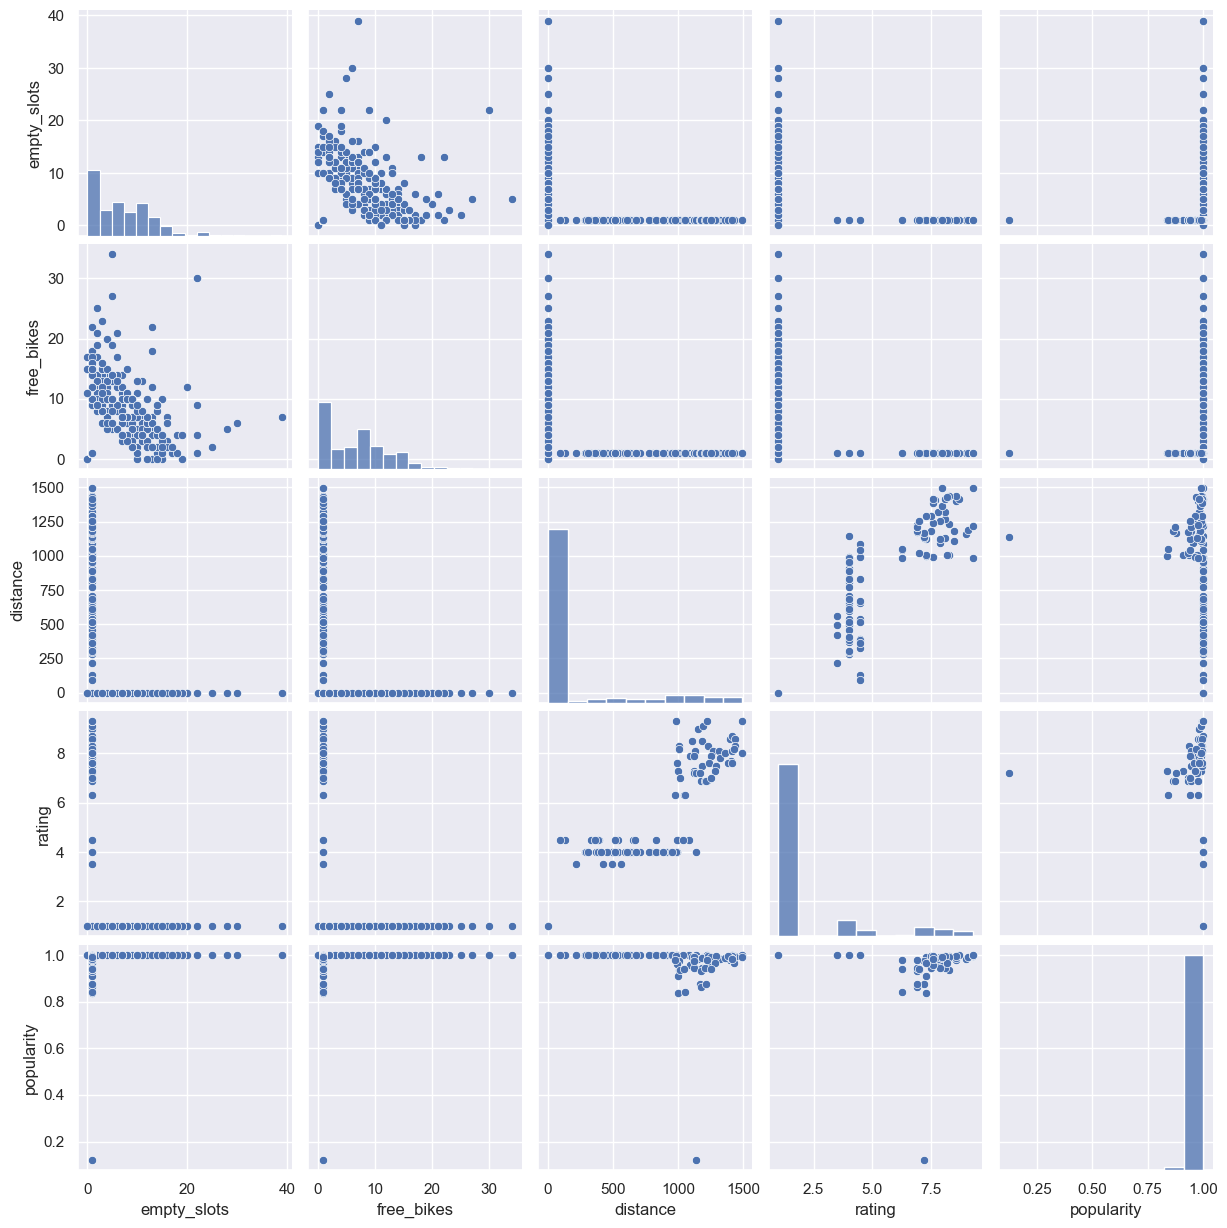

In [64]:
sns.pairplot(data=fsq_ylp_ctbk)
plt.show()


In [65]:
X = fsq_ylp_ctbk[fsq_ylp_ctbk.columns[~fsq_ylp_ctbk.columns.isin(['rating'])]]
y = fsq_ylp_ctbk['rating']

In [66]:
X.shape
X.head()

,empty_slots,free_bikes,name,lat-long,distance,popularity
0,1.0,18.0,Orient Heights T Stop - Bennington St at Sarat...,1,1.0,1.0
1,20.0,12.0,Maverick Square - Lewis Mall,1,1.0,1.0
2,2.0,14.0,East Boston Neighborhood Health Center - 20 Ma...,1,1.0,1.0
3,4.0,11.0,Bennington St at Byron St,1,1.0,1.0
4,6.0,9.0,Boston East - 126 Border St,1,1.0,1.0


In [67]:
y.tail()

481    6.9
482    6.9
483    7.6
484    8.0
485    7.0
Name: rating, dtype: float64

In [80]:
logit = smf.logit("popularity ~ rating + free_bikes + popularity + distance", data=fsq_ylp_ctbk)

In [77]:

model = logit.fit()
print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.005006
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                  486
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Jan 2023   Pseudo R-squ.:                  0.5747
Time:                        20:22:00   Log-Likelihood:                -2.4331
converged:                       True   LL-Null:                       -5.7206
Covariance Type:            nonrobust   LLR p-value:                    0.1601
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1739      8.539     -0.255      0.799     -18.910      14.562
rating        -0.3470      0

In [78]:
#evaluating the model
model.pred_table()


array([[  1.,   0.],
       [  0., 485.]])

In [ ]:
# higher p value and lower R squared value sugeests that data does not support relation between free_bikes and POI